In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from py_vollib_vectorized.models import vectorized_black_scholes
from py_vollib_vectorized.api import get_all_greeks
from py_vollib_vectorized.implied_volatility import vectorized_implied_volatility
from py_vollib_vectorized.api import price_dataframe
import statsmodels.tsa.stattools.adfuller as adf

%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels.tsa.stattools.adfuller'; 'statsmodels.tsa.stattools' is not a package

In [6]:
price = [35.436537, 35.010526]
S = 100
K = [65, 135]
t = 1/600
r = 0
flag = ['c', 'p']
vectorized_implied_volatility(price, S, K, t, r, flag, q=0, return_as='numpy')

array([6.40976207, 2.65251273])

In [7]:
S = 100
K = [65,135]
t = 1/600
r = 0
flag = ['c', 'p']
sigma = [6.40976207, 2.65251273]
get_all_greeks(flag, S, K, t, r, sigma, model='black_scholes', return_as='dict')

{'delta': [0.962222051665762, -0.9967081762891183],
 'gamma': [0.003143357005797043, 0.0009185222182850339],
 'theta': [-0.436537000834889, -0.010525999833383537],
 'rho': [0.0010130944760895488, -0.002244689066554173],
 'vega': [0.0033580271511226556, 0.0004060997053692006]}

In [8]:
df = pd.DataFrame()

df['Flag'] = ['c', 'p','c','p']

df['S'] = 100

df['K'] = [65, 135,65,135]

df['T'] = 1/600

df['R'] = 0

df['IV'] = [6.40976207, 2.65251273,6.40976207, 2.65251273]
df

# price_dataframe(df, flag_col='Flag', underlying_price_col='S', strike_col='K', annualized_tte_col='T', riskfree_rate_col='R', sigma_col='IV', model='black_scholes', inplace=False)

,Flag,S,K,T,R,IV
0,c,100,65,0.001667,0,6.409762
1,p,100,135,0.001667,0,2.652513
2,c,100,65,0.001667,0,6.409762
3,p,100,135,0.001667,0,2.652513


In [ ]:
df = pd.read_csv("../data/training_pricepaths.csv", index_col=0)
df.head()

,underlying,call65,call70,call75,call80,call85,call90,call95,call100,call105,...,put90,put95,put100,put105,put110,put115,put120,put125,put130,put135
0,100.000000,35.436537,30.436449,25.465460,20.544501,15.718957,11.091298,6.883928,3.493461,1.333979,...,1.091298,1.883928,3.493461,6.333979,10.375479,15.090290,20.025352,25.011182,30.008593,35.010526
1,99.703351,35.117638,30.116325,25.143759,20.221087,15.395046,10.773197,6.591873,3.268877,1.212482,...,1.069846,1.888522,3.565526,6.509131,10.632709,15.380026,20.322307,25.309459,30.307651,35.311125
2,99.781739,35.246585,30.252950,25.291467,20.385660,15.585513,11.000335,6.856841,3.536347,1.409663,...,1.218595,2.075101,3.754608,6.627924,10.649909,15.334966,20.254847,25.235405,30.231430,35.233703
3,99.989922,35.412877,30.423416,25.464844,20.560375,15.759372,11.169538,7.013417,3.664809,1.492569,...,1.179616,2.023495,3.674888,6.502648,10.479730,15.139596,20.050467,25.028339,30.023364,35.024824
4,99.348765,34.765348,29.783212,24.834189,19.944124,15.167839,10.623611,6.550014,3.329964,1.305116,...,1.274847,2.201250,3.981199,6.956351,11.042635,15.753561,20.681516,25.664342,30.660513,35.661443


<Axes: >

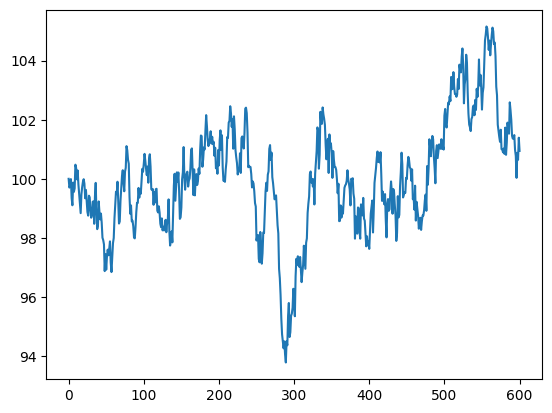

In [ ]:
df['underlying'].plot()

<Axes: >

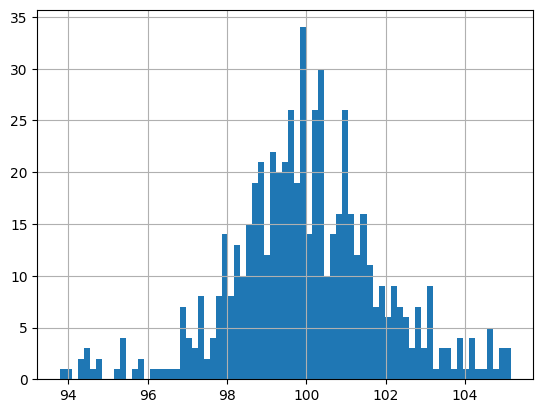

In [ ]:
df['underlying'].hist(bins=75)

In [3]:
adf(df['underlying'])

NameError: name 'adf' is not defined

In [4]:
# size = (5,4)
# for i in df.columns:
#     df[[i]].plot(figsize=size)
#     df[[i]].hist(figsize=size, bins=50)